## Problem 2

###  Predicting turbine energy yield (TEY) using ambient variables as features, with the help of Neural network.

## Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Import dataset

In [2]:
data= pd.read_csv("gas_turbines.csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


## EDA

In [3]:
# Re-arranging all Columns 
gas=data[["AT","AP","AH","AFDP","GTEP","TIT","TAT","CDP","CO","NOX","TEY"]]
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559,111.61
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917,111.78
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912,110.19
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227,110.74


In [4]:
# basic information about the data
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   CDP     15039 non-null  float64
 8   CO      15039 non-null  float64
 9   NOX     15039 non-null  float64
 10  TEY     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
gas.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,12.102353,1.972499,68.190934,134.188464
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,1.103196,2.222206,10.470586,15.829717
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,9.904400,0.000388,27.765000,100.170000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,11.622000,0.858055,61.303500,127.985000
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,12.025000,1.390200,66.601000,133.780000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,12.578000,2.160400,73.935500,140.895000
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,15.081000,44.103000,119.890000,174.610000


### Duplicate

In [6]:
gas[gas.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY


## Visualization

### Correlation using heat map

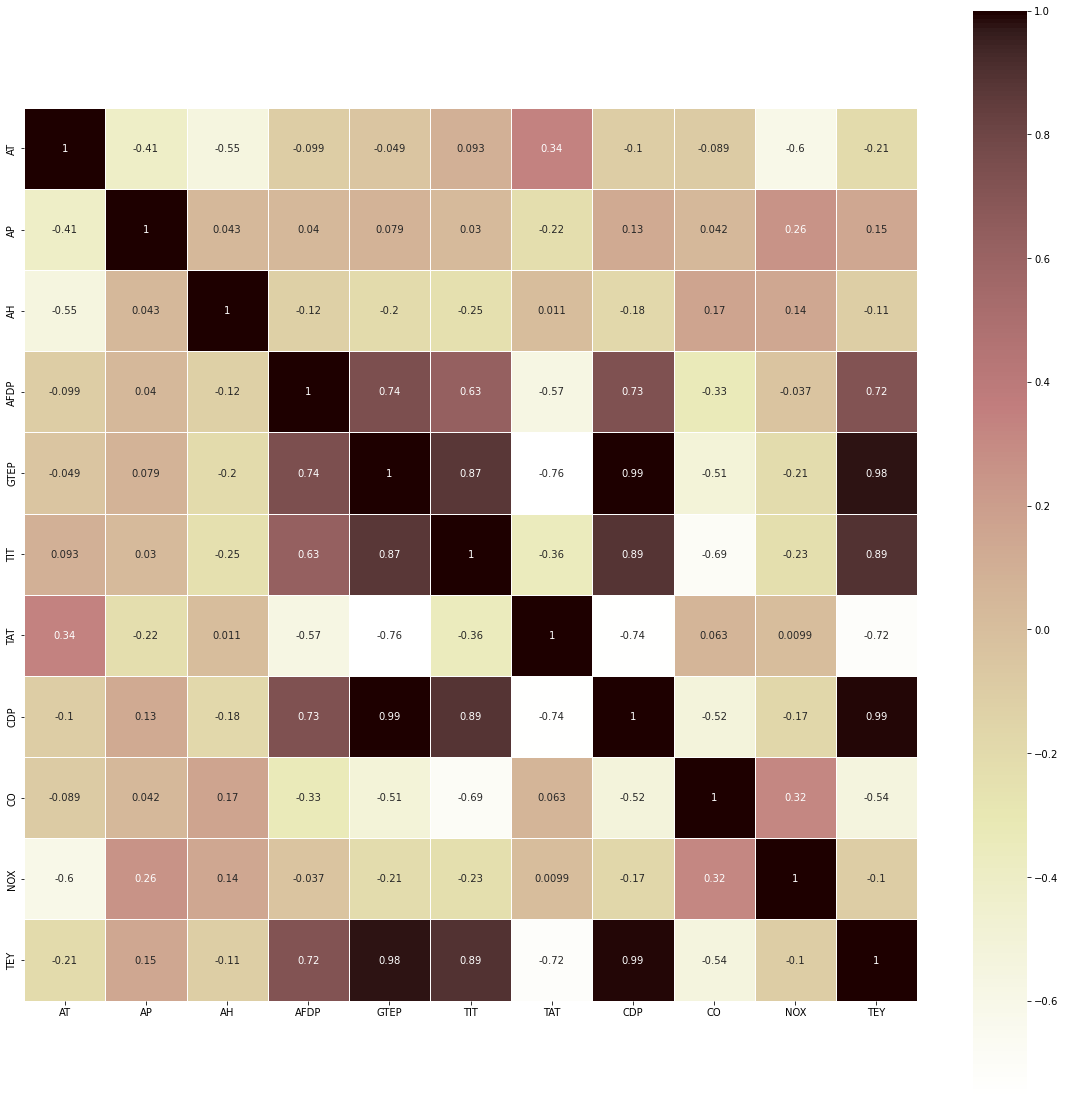

In [7]:
cor=gas.corr()
cor
plt.figure(figsize=(20,20))
sns.heatmap(data=cor,cmap="pink_r",linewidths=.5, annot=True, square= True)
plt.show()

In [8]:
# visualization of datasets

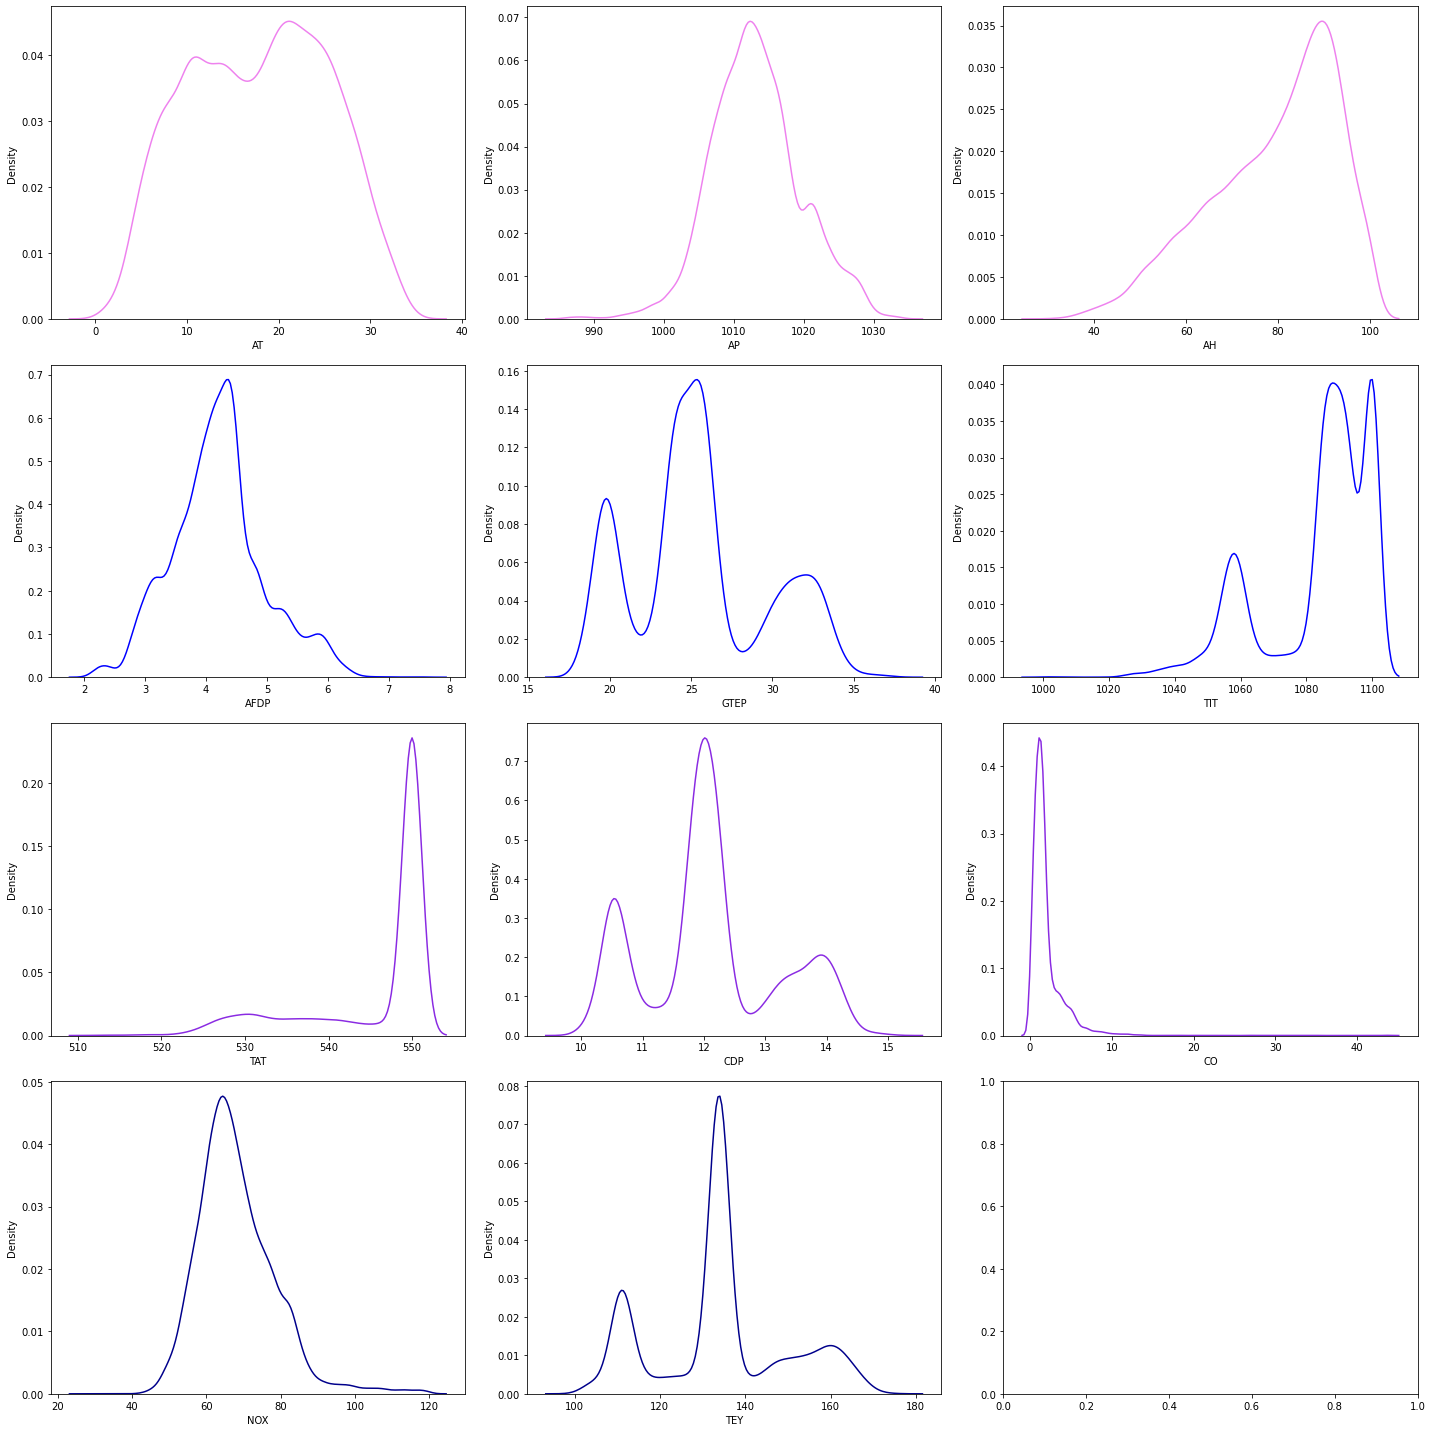

In [9]:
fig,ax=plt.subplots(4,3,figsize=(20,20))
sns.kdeplot(gas["AT"],ax=ax[0,0],color="violet")
sns.kdeplot(gas["AP"],ax=ax[0,1],color="violet")
sns.kdeplot(gas["AH"],ax=ax[0,2],color="violet")
sns.kdeplot(gas["AFDP"],ax=ax[1,0],color="blue")
sns.kdeplot(gas["GTEP"],ax=ax[1,1],color="blue")
sns.kdeplot(gas["TIT"],ax=ax[1,2],color="blue")
sns.kdeplot(gas["TAT"],ax=ax[2,0],color="blueviolet")
sns.kdeplot(gas["CDP"],ax=ax[2,1],color="blueviolet")
sns.kdeplot(gas["CO"],ax=ax[2,2],color="blueviolet")
sns.kdeplot(gas["NOX"],ax=ax[3,0],color="darkblue")
sns.kdeplot(gas["TEY"],ax=ax[3,1],color="darkblue")

plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [11]:
gas=pd.DataFrame(scaler.fit_transform(gas),columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX','TEY'])
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548,0.195191
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134,0.195459
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791,0.195325
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984,0.195459
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087,0.195459
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.095739,0.102448,0.562214,0.153681
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.102113,0.109894,0.566100,0.155965
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.111772,0.180552,0.685449,0.134605
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.121431,0.141693,0.710578,0.141994


In [12]:
from sklearn.preprocessing import LabelEncoder
gas=gas.apply(LabelEncoder().fit_transform)
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,1230,292,12092,2208,787,292,2285,461,10695,10885,707
1,1199,297,12149,2207,842,293,2285,454,10775,10892,709
2,1251,301,11882,2148,883,294,2272,457,10746,10835,708
3,1334,305,11699,2138,892,296,2284,462,10738,10875,709
4,1505,310,11676,2197,871,297,2283,468,10782,10774,709
...,...,...,...,...,...,...,...,...,...,...,...
15034,2278,269,12369,2376,382,197,1964,256,11809,10229,491
15035,1732,272,12467,2230,577,163,1742,289,12015,10317,508
15036,1433,276,12533,2121,675,83,1247,339,12818,11571,352
15037,1302,281,12449,2009,545,135,1583,389,12579,11636,406


In [13]:
gas["TEY"].describe()

count    15039.00000
mean      1818.09994
std        999.24952
min          0.00000
25%       1344.50000
50%       1739.00000
75%       2191.50000
max       4206.00000
Name: TEY, dtype: float64

In [14]:
gas["TEY NEW"]=pd.cut(gas["TEY"],bins=[0,1739,4206],labels=[0,1])
gas2=gas.drop(["TEY"],axis=1)
gas2

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY NEW
0,1230,292,12092,2208,787,292,2285,461,10695,10885,0
1,1199,297,12149,2207,842,293,2285,454,10775,10892,0
2,1251,301,11882,2148,883,294,2272,457,10746,10835,0
3,1334,305,11699,2138,892,296,2284,462,10738,10875,0
4,1505,310,11676,2197,871,297,2283,468,10782,10774,0
...,...,...,...,...,...,...,...,...,...,...,...
15034,2278,269,12369,2376,382,197,1964,256,11809,10229,0
15035,1732,272,12467,2230,577,163,1742,289,12015,10317,0
15036,1433,276,12533,2121,675,83,1247,339,12818,11571,0
15037,1302,281,12449,2009,545,135,1583,389,12579,11636,0


In [15]:
gas2["TEY NEW"].nunique

<bound method IndexOpsMixin.nunique of 0        0
1        0
2        0
3        0
4        0
        ..
15034    0
15035    0
15036    0
15037    0
15038    0
Name: TEY NEW, Length: 15039, dtype: category
Categories (2, int64): [0 < 1]>

In [16]:
gas2.values

array([[ 1230,   292, 12092, ..., 10695, 10885,     0],
       [ 1199,   297, 12149, ..., 10775, 10892,     0],
       [ 1251,   301, 11882, ..., 10746, 10835,     0],
       ...,
       [ 1433,   276, 12533, ..., 12818, 11571,     0],
       [ 1302,   281, 12449, ..., 12579, 11636,     0],
       [ 1266,   285, 12227, ..., 12087, 11620,     0]], dtype=int64)

In [17]:
x=gas2.iloc[:,0:10]
y=gas2.iloc[:,10]

In [18]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,1230,292,12092,2208,787,292,2285,461,10695,10885
1,1199,297,12149,2207,842,293,2285,454,10775,10892
2,1251,301,11882,2148,883,294,2272,457,10746,10835
3,1334,305,11699,2138,892,296,2284,462,10738,10875
4,1505,310,11676,2197,871,297,2283,468,10782,10774
...,...,...,...,...,...,...,...,...,...,...
15034,2278,269,12369,2376,382,197,1964,256,11809,10229
15035,1732,272,12467,2230,577,163,1742,289,12015,10317
15036,1433,276,12533,2121,675,83,1247,339,12818,11571
15037,1302,281,12449,2009,545,135,1583,389,12579,11636


In [19]:
y

0        0
1        0
2        0
3        0
4        0
        ..
15034    0
15035    0
15036    0
15037    0
15038    0
Name: TEY NEW, Length: 15039, dtype: category
Categories (2, int64): [0 < 1]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.33)

### Constructing a Sequential Neural Network with

### input neurons: 32 neurons

### hidden layer: 10 neurons

### output layer : 1 neuron

In [22]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense

In [23]:
model = Sequential()
model.add(Dense(32, input_dim=10, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(10, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

## Model fitting

In [25]:
history=model.fit(x,y,validation_split=0.33,epochs=150,batch_size=10)

Epoch 1/150
1008/1008 [==============================] - 7s 5ms/step - loss: 0.3741 - acc: 0.7916 - val_loss: nan - val_acc: 0.8392
Epoch 2/150
1008/1008 [==============================] - 5s 5ms/step - loss: 0.3266 - acc: 0.8216 - val_loss: nan - val_acc: 0.8281
Epoch 3/150
1008/1008 [==============================] - 5s 5ms/step - loss: 0.3155 - acc: 0.8301 - val_loss: nan - val_acc: 0.8567
Epoch 4/150
1008/1008 [==============================] - 5s 5ms/step - loss: 0.2996 - acc: 0.8397 - val_loss: nan - val_acc: 0.8747
Epoch 5/150
1008/1008 [==============================] - 5s 5ms/step - loss: 0.2903 - acc: 0.8518 - val_loss: nan - val_acc: 0.8277
Epoch 6/150
1008/1008 [==============================] - 5s 5ms/step - loss: 0.2858 - acc: 0.8522 - val_loss: nan - val_acc: 0.8495
Epoch 7/150
1008/1008 [==============================] - 5s 5ms/step - loss: 0.2825 - acc: 0.8569 - val_loss: nan - val_acc: 0.8825
Epoch 8/150
1008/1008 [==============================] - 5s 5ms/step - loss:

1008/1008 [==============================] - 5s 5ms/step - loss: 0.2391 - acc: 0.8840 - val_loss: nan - val_acc: 0.8884
Epoch 63/150
1008/1008 [==============================] - 4s 4ms/step - loss: 0.2439 - acc: 0.8805 - val_loss: nan - val_acc: 0.8876
Epoch 64/150
1008/1008 [==============================] - 5s 4ms/step - loss: 0.2378 - acc: 0.8883 - val_loss: nan - val_acc: 0.8785
Epoch 65/150
1008/1008 [==============================] - 5s 5ms/step - loss: 0.2422 - acc: 0.8834 - val_loss: nan - val_acc: 0.8803
Epoch 66/150
1008/1008 [==============================] - 5s 5ms/step - loss: 0.2371 - acc: 0.8840 - val_loss: nan - val_acc: 0.8870
Epoch 67/150
1008/1008 [==============================] - 5s 5ms/step - loss: 0.2374 - acc: 0.8864 - val_loss: nan - val_acc: 0.8833
Epoch 68/150
1008/1008 [==============================] - 4s 4ms/step - loss: 0.2430 - acc: 0.8793 - val_loss: nan - val_acc: 0.8910
Epoch 69/150
1008/1008 [==============================] - 5s 5ms/step - loss: 0.23

1008/1008 [==============================] - 5s 5ms/step - loss: 0.2314 - acc: 0.8893 - val_loss: nan - val_acc: 0.8920
Epoch 124/150
1008/1008 [==============================] - 5s 5ms/step - loss: 0.2334 - acc: 0.8855 - val_loss: nan - val_acc: 0.8860
Epoch 125/150
1008/1008 [==============================] - 5s 5ms/step - loss: 0.2314 - acc: 0.8912 - val_loss: nan - val_acc: 0.8856
Epoch 126/150
1008/1008 [==============================] - 5s 5ms/step - loss: 0.2334 - acc: 0.8874 - val_loss: nan - val_acc: 0.8918
Epoch 127/150
1008/1008 [==============================] - 5s 5ms/step - loss: 0.2341 - acc: 0.8867 - val_loss: nan - val_acc: 0.8902
Epoch 128/150
1008/1008 [==============================] - 5s 5ms/step - loss: 0.2333 - acc: 0.8896 - val_loss: nan - val_acc: 0.8888
Epoch 129/150
1008/1008 [==============================] - 5s 5ms/step - loss: 0.2327 - acc: 0.8880 - val_loss: nan - val_acc: 0.8892
Epoch 130/150
1008/1008 [==============================] - 4s 4ms/step - los

### Model Evaluation

In [26]:
scores= model.evaluate(x,y)
print("%s:%.2f%%" % (model.metrics_names[1],scores[1]*100))

470/470 [==============================] - 1s 3ms/step - loss: nan - acc: 0.8895
acc:88.95%


In [27]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### Visualization for Accuracy

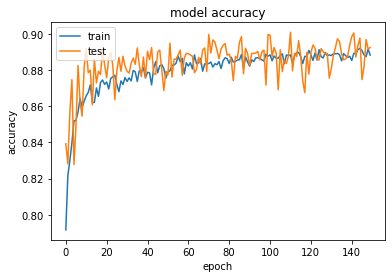

In [28]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Visualization for loss

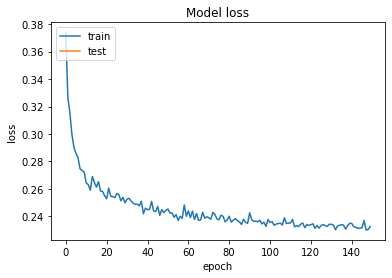

In [29]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train","test"],loc="upper left")
plt.show()

#### ============================================================================================================================